In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 1. Import Dataset


In [2]:
df = pd.read_csv('ObesityDataSet.csv', encoding='latin-1')

### 2 Exploration Dataset

In [3]:
# Preview of the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


##### Indice de masse corporelle= Weight/(Height*Height)


    • Insuffisance pondérale inférieure à 18,5

    • Normal 18,5 à 24,9

    • Surpoids 25,0 à 29,9

    • Obésité I 30,0 à 34,9

    • Obésité II 35,0 à 39,9

    • Obésité III supérieure à 40

In [5]:
# Add IMC column
#df['IMC'] = df['Weight']/(df['Height']*df['Height'])

In [6]:
# Shape of the dataset 
df.shape

(2111, 17)

In [7]:
# Columns of the dataset 
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
# Types of the features
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [9]:
# Number of NA per columns
df.isna().sum().sort_values(ascending=True)

Gender                            0
CALC                              0
TUE                               0
FAF                               0
SCC                               0
CH2O                              0
SMOKE                             0
MTRANS                            0
CAEC                              0
FCVC                              0
FAVC                              0
family_history_with_overweight    0
Weight                            0
Height                            0
Age                               0
NCP                               0
NObeyesdad                        0
dtype: int64

#####  We can see that we don't have NA values

Our dataset is therefore already cleaned up because neither column of the two datasets contains undetermined values.

In [10]:
temp=dict(zip(df["Gender"].unique(),["1","2"]))
df["Gender"].replace(temp,inplace=True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,2,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,2,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,2,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Replace qualitative features by numerical values

In [11]:
temp=dict(zip(df["family_history_with_overweight"].unique(),range(2)))
df["family_history_with_overweight"].replace(temp,inplace=True)

In [12]:
temp=dict(zip(df["FAVC"].unique(),range(2)))
df["FAVC"].replace(temp,inplace=True)

In [13]:
temp=dict(zip(df["CAEC"].unique(),range(4)))
df["CAEC"].replace(temp,inplace=True)

In [14]:
temp=dict(zip(df["SMOKE"].unique(),range(2)))
df["SMOKE"].replace(temp,inplace=True)

In [15]:
temp=dict(zip(df["SCC"].unique(),range(2)))
df["SCC"].replace(temp,inplace=True)

In [16]:
temp=dict(zip(df["CALC"].unique(),range(4)))
df["CALC"].replace(temp,inplace=True)

In [17]:
temp=dict(zip(df["MTRANS"].unique(),range(5)))
df["MTRANS"].replace(temp,inplace=True)

In [18]:
temp=dict(zip(df["NObeyesdad"].unique(), range(7)))
df["NObeyesdad"].replace(temp, inplace=True)

### 3. Data Visualization 

In [19]:
df_copy=df.copy()
target = 'NObeyesdad'
features_list = list(df_copy.columns)
features_list.remove(target)

Text(0.65, 1.25, 'NObeyesdad Univariate Plots')

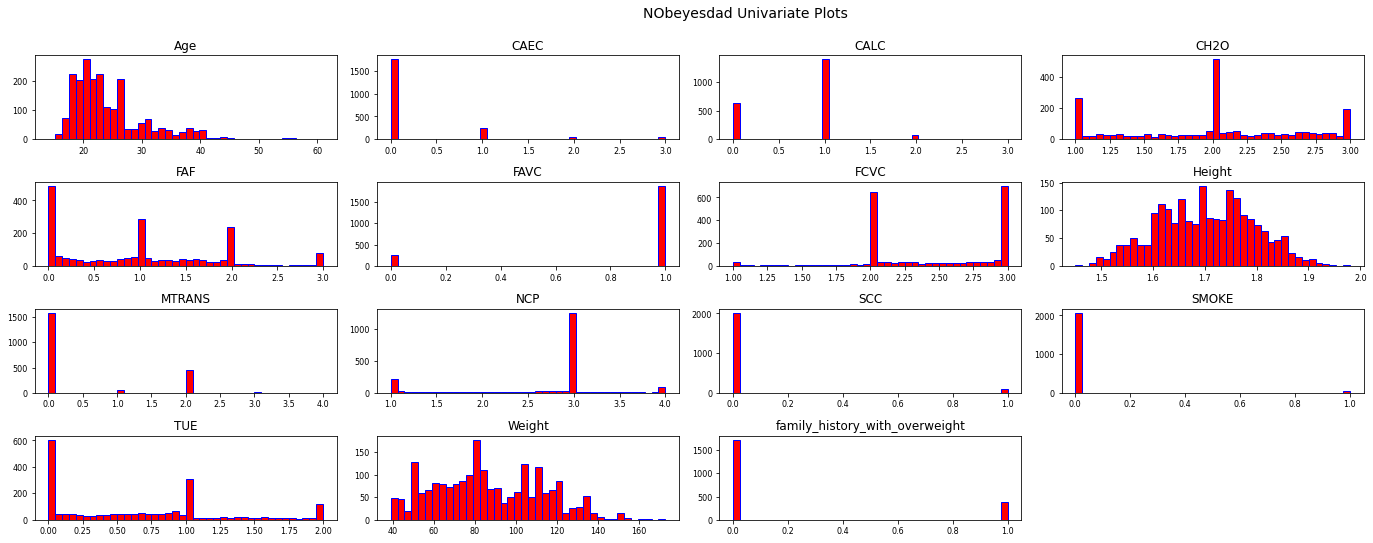

In [20]:
df_copy[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('NObeyesdad Univariate Plots', x=0.65, y=1.25, fontsize=14)

Text(0.65, 1.25, 'Obesity Quality Plot')

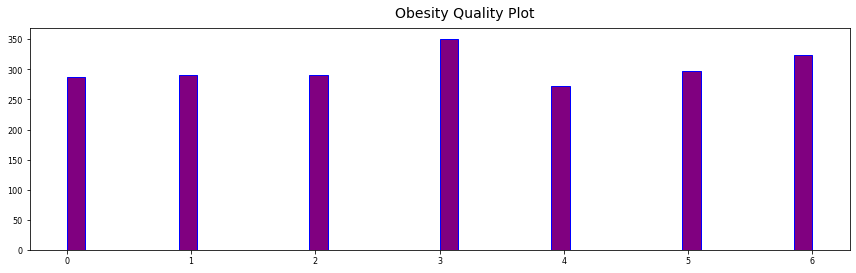

In [21]:
df_copy[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(10,3), color='purple')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Obesity Quality Plot', x=0.65, y=1.25, fontsize=14)

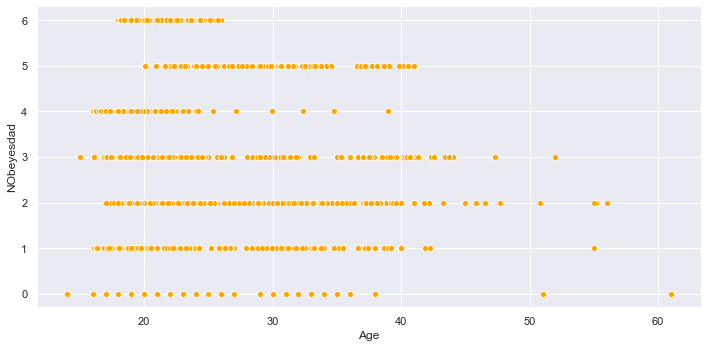

In [22]:
sns.set()
sns.relplot(data=df_copy, x='Age', y=target, kind='scatter', height=5, aspect=2, color='orange')

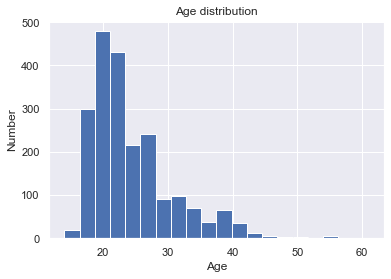

In [23]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Age'],bins = 20) 
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number')
plt.color='orange'
plt.show()

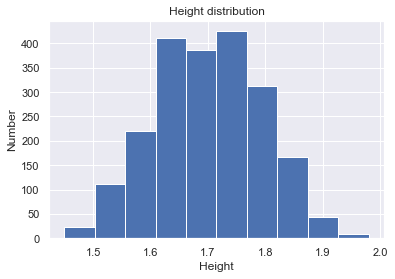

In [24]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Height'],bins = 10) 
plt.title('Height distribution')
plt.xlabel('Height')
plt.ylabel('Number')
plt.show()

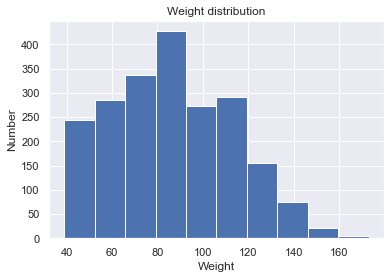

In [25]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Weight'],bins = 10) 
plt.title('Weight distribution')
plt.xlabel('Weight')
plt.ylabel('Number')
plt.show()

Text(0.5, 1.0, 'Count obesity')

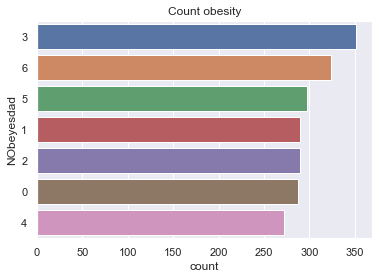

In [26]:
sns.countplot(y="NObeyesdad", data=df, order = df['NObeyesdad'].value_counts().index).set_title("Count obesity")

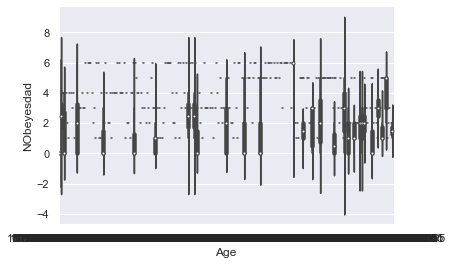

In [27]:
sns.violinplot(df['Age'], df['NObeyesdad']) #Variable Plot
sns.despine()


count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64


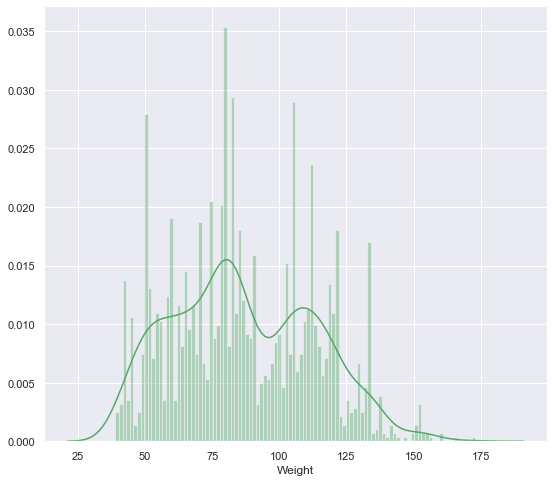

In [28]:
print(df['Weight'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Weight'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [29]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SMOKE', y='IMC', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

ValueError: Could not interpret input 'IMC'

<Figure size 864x432 with 0 Axes>

In [ ]:
#Alcool
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='CALC', y='IMC', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='family_history_with_overweight', y='IMC', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [ ]:
sns.countplot(df["family_history_with_overweight"])

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Prepocessing data

We split our datas in training and test data:

In [30]:
x,y = df.loc[:,df.columns != 'NObeyesdad'], df.loc[:,'NObeyesdad']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

Now we can scale our datas:


In [31]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Vizualisation

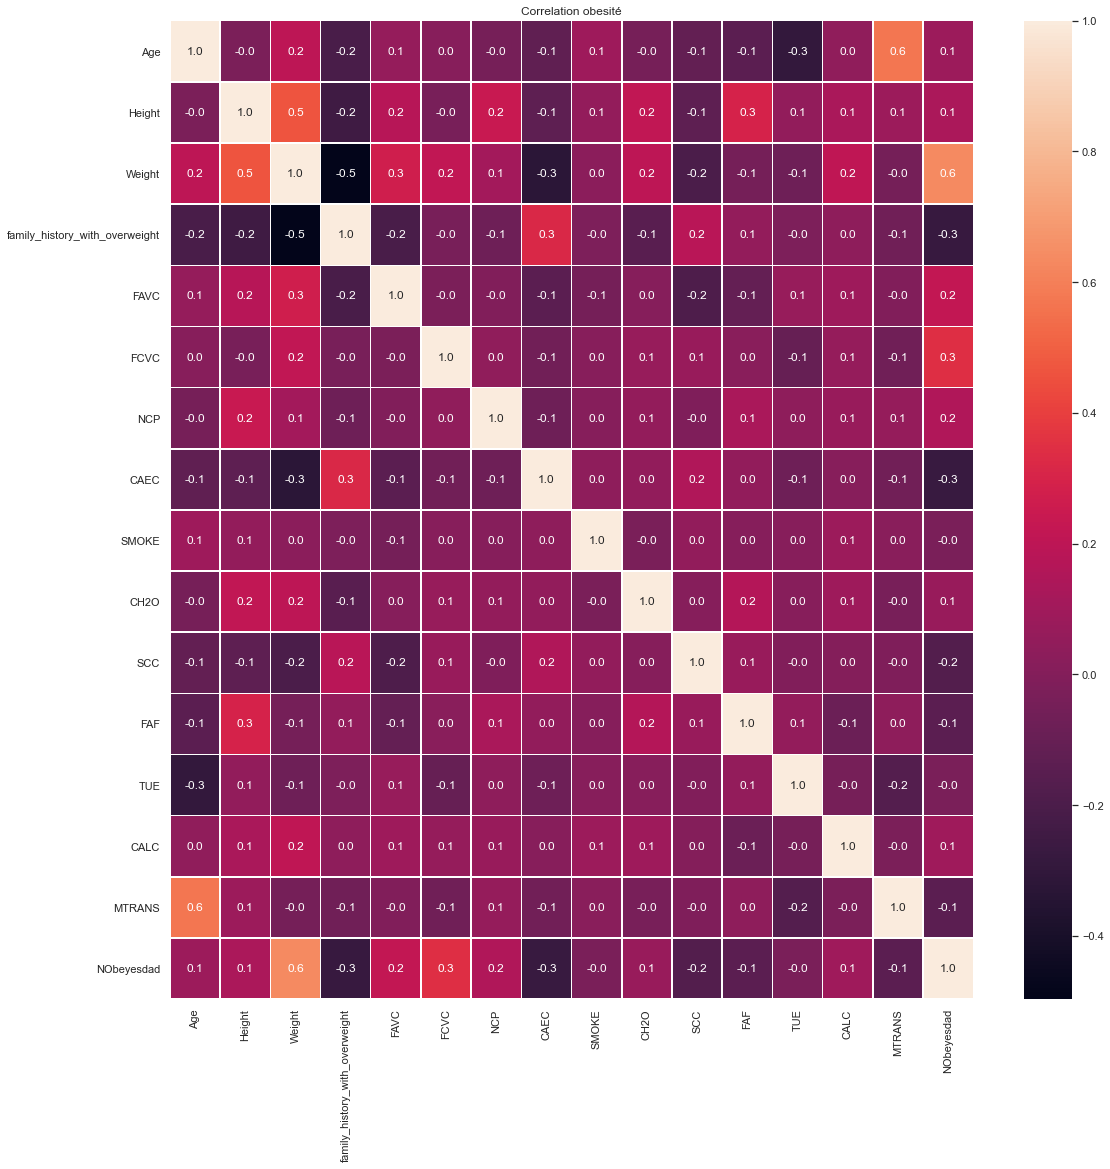

In [32]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax).set(title="Correlation obesité")
plt.show()

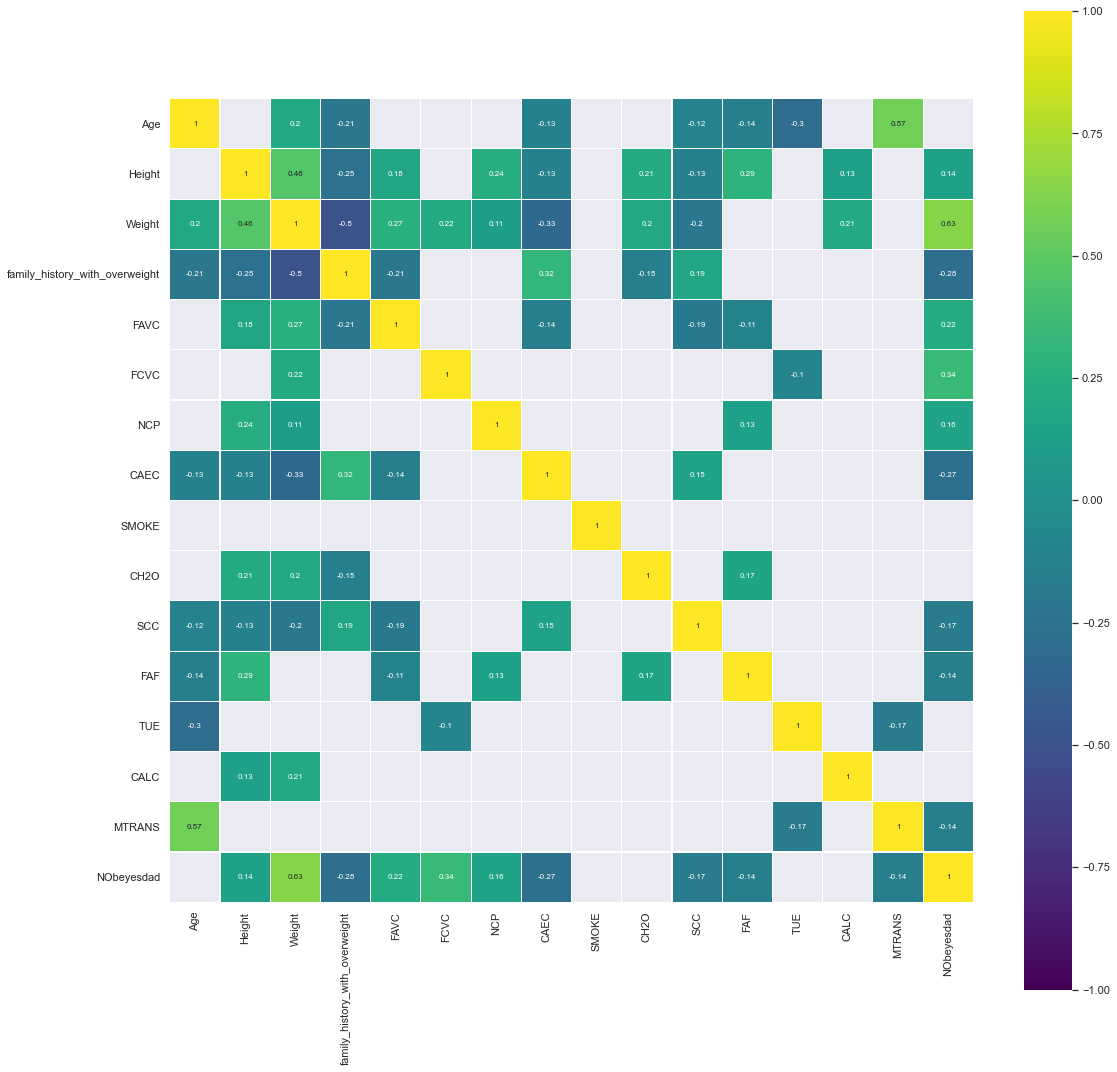

In [33]:
corr= df.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, ax=ax,annot_kws={"size": 8}, square=True)

### 5. Machine Learning Models

#### Supervised

In [34]:
# Ici tente des trucs si tu le sens faut faire des modèles, en créant un training et test data 
# et choper la meilleure précisision un peu comme au hackaton 

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [35]:
scores = []
predictions_list = []

#### KNN

In [36]:
# train test split
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8501577287066246


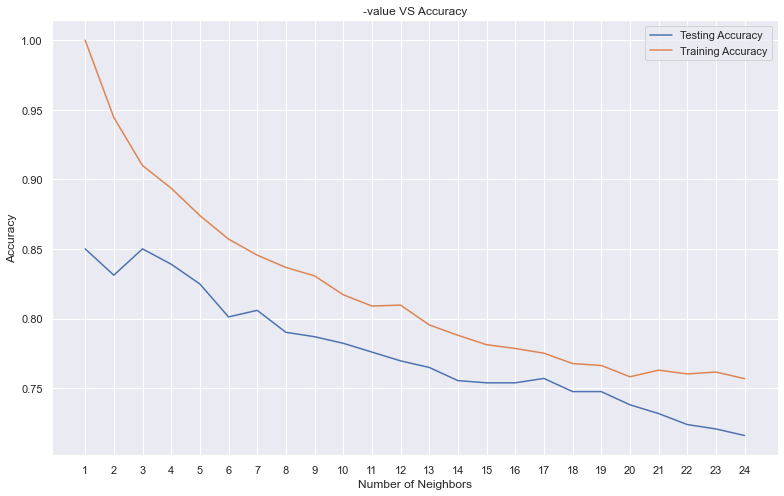

Best accuracy is 0.8501577287066246 with K = 1


In [37]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

#### About Confusion Matrix
    • tp = Prediction is positive(normal) and actual is positive(normal).
    • fp = Prediction is positive(normal) and actual is negative(abnormal).
    • fn = Prediction is negative(abnormal) and actual is positive(normal).
    • tn = Prediction is negative(abnormal) and actual is negative(abnormal)
    • precision = tp / (tp+fp)
    • recall = tp / (tp+fn)
    • f1 = 2 precision recall / ( precision + recall)

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(max_iter= 2000, random_state=10)
logreg.fit(x_train,y_train)
y_pred= logreg.predict(x_test)
logreg.score(x_train,y_train)

0.8970886932972241

Confusion matrix: 
 [[45 15  2  0 15  0  0]
 [ 8 67 14  0  0  0  0]
 [ 1 11 64  9  0  0  0]
 [ 0  0  5 98  0 10  1]
 [ 4  0  0  0 88  0  0]
 [ 0  0  0  3  0 82  0]
 [ 0  0  0  1  0  0 91]]
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.58      0.67        77
           1       0.72      0.75      0.74        89
           2       0.75      0.75      0.75        85
           3       0.88      0.86      0.87       114
           4       0.85      0.96      0.90        92
           5       0.89      0.96      0.93        85
           6       0.99      0.99      0.99        92

    accuracy                           0.84       634
   macro avg       0.84      0.84      0.84       634
weighted avg       0.84      0.84      0.84       634

Accuracy Score : 0.8438485804416404


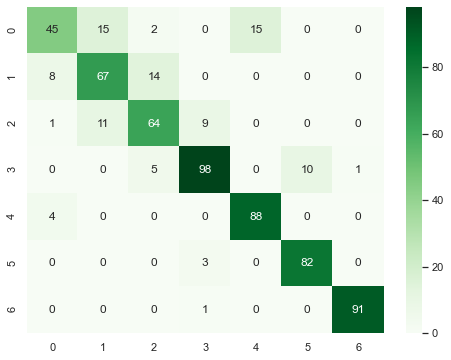

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(accuracy_score(y_test, y_pred)))

# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

### LDA

Confusion matrix: 
 [[ 67   0  10   0   0   0   0]
 [  7   0  82   0   0   0   0]
 [  0   0  83   2   0   0   0]
 [  0   0   4 110   0   0   0]
 [ 92   0   0   0   0   0   0]
 [  0   0   0   3   0  75   7]
 [  0   0   0   0   0  18  74]]
Classification report: 
               precision    recall  f1-score   support

           0       0.40      0.87      0.55        77
           1       0.00      0.00      0.00        89
           2       0.46      0.98      0.63        85
           3       0.96      0.96      0.96       114
           4       0.00      0.00      0.00        92
           5       0.81      0.88      0.84        85
           6       0.91      0.80      0.86        92

    accuracy                           0.65       634
   macro avg       0.51      0.64      0.55       634
weighted avg       0.52      0.65      0.56       634

Accuracy0.6451104100946372


C:\Users\jeann\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


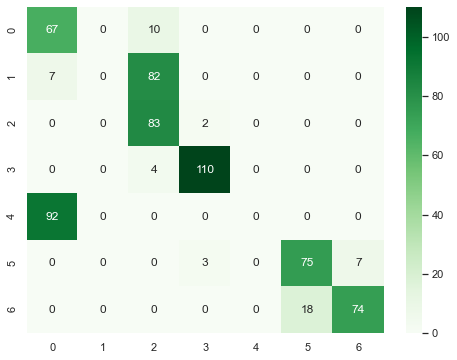

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train_new = lda.fit_transform(x_train, y_train)
x_test_new = lda.transform(x_test)


classifier = RandomForestClassifier(max_depth=2, random_state=4)

classifier.fit(x_train_new, y_train)
y_pred = classifier.predict(x_test_new)

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

### Decision Tree Classifier

In [41]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred_gini))
print('Accuracy' + str(accuracy_score(y_test, y_pred_gini)))


Confusion matrix: 
 [[ 67   0  10   0   0   0   0]
 [  7   0  82   0   0   0   0]
 [  0   0  83   2   0   0   0]
 [  0   0   4 110   0   0   0]
 [ 92   0   0   0   0   0   0]
 [  0   0   0   3   0  75   7]
 [  0   0   0   0   0  18  74]]
Classification report: 
               precision    recall  f1-score   support

           0       0.48      0.45      0.47        77
           1       0.54      0.51      0.52        89
           2       0.37      0.87      0.52        85
           3       0.84      0.18      0.30       114
           4       0.89      0.64      0.75        92
           5       0.84      0.93      0.88        85
           6       1.00      1.00      1.00        92

    accuracy                           0.64       634
   macro avg       0.71      0.66      0.63       634
weighted avg       0.72      0.64      0.63       634

Accuracy0.638801261829653


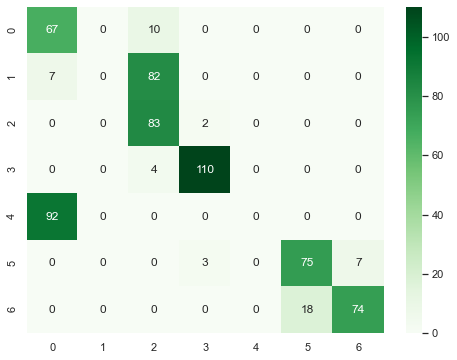

In [42]:
# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

### Random Forest

Confusion matrix: 
 [[ 70   2   2   0   3   0   0]
 [ 11  75   3   0   0   0   0]
 [  2   3  79   1   0   0   0]
 [  1   0   4 108   0   1   0]
 [  4   0   0   0  88   0   0]
 [  0   0   0   0   0  85   0]
 [  0   0   0   0   0   0  92]]
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        77
           1       0.94      0.84      0.89        89
           2       0.90      0.93      0.91        85
           3       0.99      0.95      0.97       114
           4       0.97      0.96      0.96        92
           5       0.99      1.00      0.99        85
           6       1.00      1.00      1.00        92

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634

Accuracy0.9416403785488959


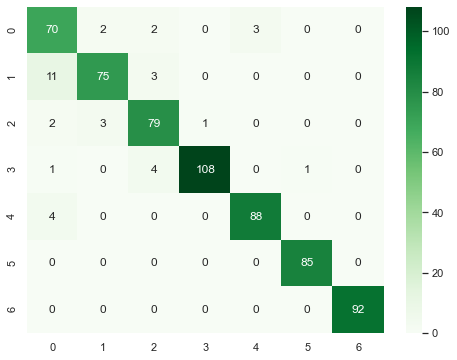

In [102]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=300, random_state=50)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

### Bagging

Confusion matrix: 
 [[ 70   3   0   0   4   0   0]
 [  4  80   5   0   0   0   0]
 [  0   4  77   4   0   0   0]
 [  0   0   0 111   0   3   0]
 [  2   0   0   0  90   0   0]
 [  0   0   0   3   0  82   0]
 [  0   0   0   0   0   0  92]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92        77
           1       0.92      0.90      0.91        89
           2       0.94      0.91      0.92        85
           3       0.94      0.97      0.96       114
           4       0.96      0.98      0.97        92
           5       0.96      0.96      0.96        85
           6       1.00      1.00      1.00        92

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634

Accuracy0.9495268138801262


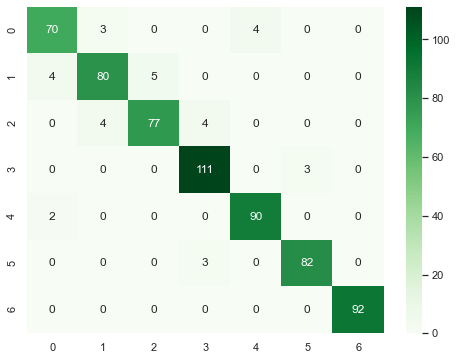

In [103]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=300, random_state=50)
bagging.fit(x_train, y_train)

y_pred = bagging.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

### Histogram-based Gradient Boosting

Confusion matrix: 
 [[ 73   2   0   0   2   0   0]
 [  4  82   3   0   0   0   0]
 [  0   1  82   2   0   0   0]
 [  0   0   1 112   0   1   0]
 [  3   0   0   0  89   0   0]
 [  0   0   0   0   0  85   0]
 [  0   0   0   0   0   1  91]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        77
           1       0.96      0.92      0.94        89
           2       0.95      0.96      0.96        85
           3       0.98      0.98      0.98       114
           4       0.98      0.97      0.97        92
           5       0.98      1.00      0.99        85
           6       1.00      0.99      0.99        92

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Accuracy0.9684542586750788


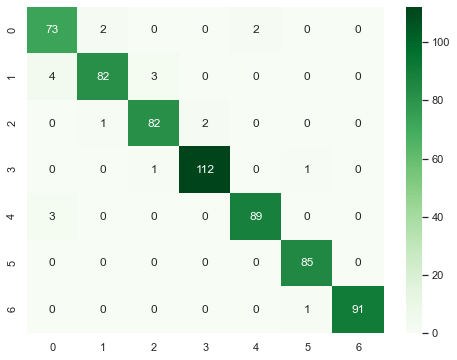

In [105]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

boost = HistGradientBoostingClassifier(random_state=50)
boost.fit(x_train, y_train)

y_pred = boost.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

### Gradient Boosting

Confusion matrix: 
 [[ 71   3   0   0   3   0   0]
 [  3  79   7   0   0   0   0]
 [  1   1  81   2   0   0   0]
 [  0   0   1 111   0   2   0]
 [  1   0   0   0  91   0   0]
 [  0   0   0   0   0  85   0]
 [  0   0   0   0   0   1  91]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93        77
           1       0.95      0.89      0.92        89
           2       0.91      0.95      0.93        85
           3       0.98      0.97      0.98       114
           4       0.97      0.99      0.98        92
           5       0.97      1.00      0.98        85
           6       1.00      0.99      0.99        92

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

Accuracy0.9605678233438486


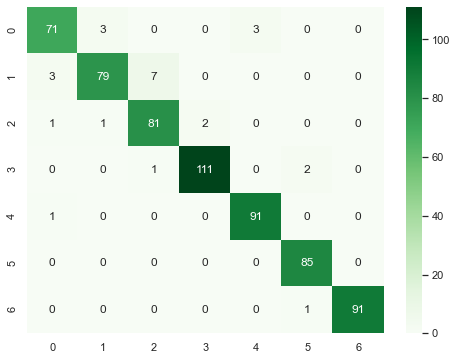

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier(n_estimators=300, random_state=50)
gboost.fit(x_train, y_train)

y_pred = gboost.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

In [95]:
algoritms = ["Logistic Regression" ,"LDA", "Decision Tree Classifier", "Random Forest","Bagging", "Boosting" ]


#scores.append(knn.score(x_train,y_train))
scores.append(logreg.score(x_train,y_train))
scores.append(lda.score(x_train,y_train))
scores.append(clf_gini.score(x_train,y_train))
scores.append(RF.score(x_train,y_train))
scores.append(boost.score(x_train,y_train))
scores.append(bagging.score(x_train,y_train))

#predictions_KNN = knn.predict(x_test)
#predictions_list.append(accuracy_score(y_test, predictions_KNN))
predictions_LR = logreg.predict(x_test)
predictions_list.append(accuracy_score(y_test, predictions_LR))
predictions_LDA = lda.predict(x_test)
predictions_list.append(accuracy_score(y_test, predictions_LDA))
predictions_CLTREE = clf_gini.predict(x_test)
predictions_list.append(accuracy_score(y_test, predictions_CLTREE))
predictions_RF = RF.predict(x_test)
predictions_list.append(accuracy_score(y_test, predictions_RF))
predictions_BOOSTING = boost.predict(x_test)
predictions_list.append(accuracy_score(y_test, predictions_BOOSTING))
predictions_BAGGING = bagging.predict(x_test)
predictions_list.append(accuracy_score(y_test, predictions_BAGGING))


import plotly.graph_objs as go

layout = {
    'title' : 'Percentage Of Success Of Algorithms And Test Result',
    'xaxis' : {
        'title' : 'Algoritms',
    },
    'yaxis' : {
        'title' : '%',
    },
}

trace1 = go.Bar(
    name = 'Train Set',
    x = algoritms,
    y = scores,
    marker = dict(
      color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=2,
        )  
    ),
)

trace2 = go.Bar(
    name = 'Test Set',
    x = algoritms,
    y = predictions_list,
    marker = dict(
      color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=2,
        )  
    ),
)

fig = go.Figure(data = [trace1, trace2], layout = layout)
py.offline.iplot(fig)


ModuleNotFoundError: No module named 'plotly'

### Features selection

We have selected Gradient Boosting algorithm because it less performant than Hist-Boosting but we can drop some features.

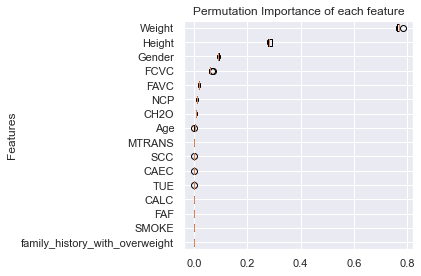

In [106]:
from sklearn.inspection import permutation_importance

result = permutation_importance(gboost, x_train, y_train, n_repeats=10, random_state=0, n_jobs=-1)
fig, ax = plt.subplots()
sorted_idx = result.importances_mean.argsort()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
ax.set_title("Permutation Importance of each feature")
ax.set_ylabel("Features")
fig.tight_layout()
plt.show()

We can keep 4 features to simplify our model:

In [142]:
importances = gboost.feature_importances_.argsort()

x_train_new = x_train[:,importances[0:4]]
x_test_new = x_test[:,importances[0:4]]

(1477, 4)


We can calculate the new accuracy and compare:

In [143]:
new_gboost = GradientBoostingClassifier(n_estimators=300, random_state=50)
new_gboost.fit(x_train_new, y_train)


y_pred = gboost.predict(x_test)
y_pred_new = new_gboost.predict(x_test_new)
print(sorted_idx)
print(gboost.feature_importances_.argsort())

print('Old Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('New Accuracy: ' + str(accuracy_score(y_test, y_pred_new)))

[ 4  9 12 14 13  8 11 15  1 10  7  5  6  0  2  3]
[ 9  4 15 11 13  8  5  7 12 10 14  1  0  6  2  3]
Old Accuracy: 0.9605678233438486
New Accuracy: 0.12933753943217666


### Model exportation

In [110]:
import pickle
pickle.dump(boost, open('model.pkl', 'wb'))

